In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('imports-85.data')
df=df.drop(['num-of-doors'],axis=1)
df.replace({'?':np.nan},inplace=True)

n=len(df)
#print(df.info())

In [3]:
#df['normalized-losses'].fillna(df['normalized-losses'].mean(),inplace=True)
#df['price']=df['price'].astype(float)

null_column=df.columns[df.isnull().any()]

for i in range(len(null_column)):
    df[null_column[i]]=df[null_column[i]].astype(float)
    df[null_column[i]].fillna((df[null_column[i]].mean()),inplace=True)
    
#print(df.isnull().sum())

In [4]:
# selecting categorical column from data set
categorical=df.select_dtypes(exclude=[np.number])
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
make                205 non-null object
fuel-type           205 non-null object
aspiration          205 non-null object
body-style          205 non-null object
drive-wheels        205 non-null object
engine-location     205 non-null object
engine-type         205 non-null object
num-of-cylinders    205 non-null object
fuel-system         205 non-null object
dtypes: object(9)
memory usage: 14.5+ KB


In [5]:
#df.columns.values
#df.info()

# EDA

In [6]:
df['price'].min(),df['price'].max()

(5118.0, 45400.0)

In [7]:
df.groupby('body-style').count()*100/n

,symboling,normalized-losses,make,fuel-type,aspiration,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
body-style,,,,,,,,,,,,,,,,,,,,,
convertible,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,...,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829,2.926829
hardtop,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,...,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439,3.902439
hatchback,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,...,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341,34.146341
sedan,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,...,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268,46.829268
wagon,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,...,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122,12.195122


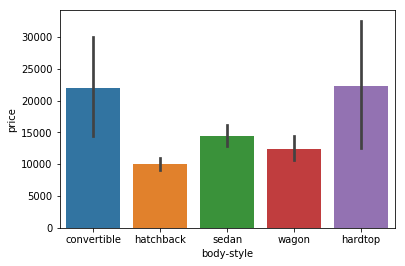

In [8]:
sns.barplot(x='body-style',y='price',data=df)

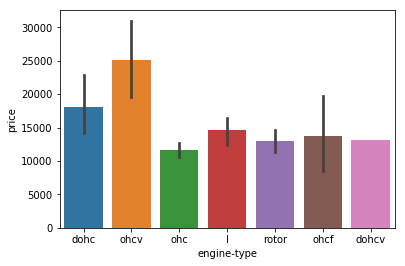

In [9]:
sns.barplot(x='engine-type',y='price',data=df)

In [10]:
df[(df['engine-type']=='ohcv')&(df['body-style']=='convertible')]['price'].value_counts()

35056.0    1
Name: price, dtype: int64

In [11]:
df[(df['engine-type']=='ohcv')&(df['body-style']=='hatchback')]['price'].value_counts()

18399.0    1
17199.0    1
19699.0    1
16500.0    1
Name: price, dtype: int64

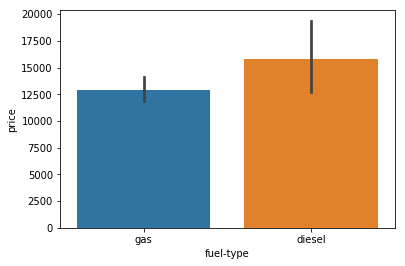

In [12]:
sns.barplot(x='fuel-type',y='price',data=df)

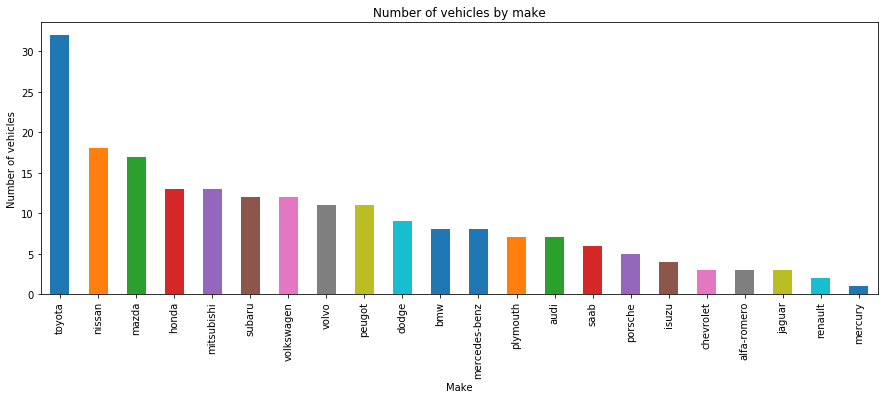

In [13]:
df.make.value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

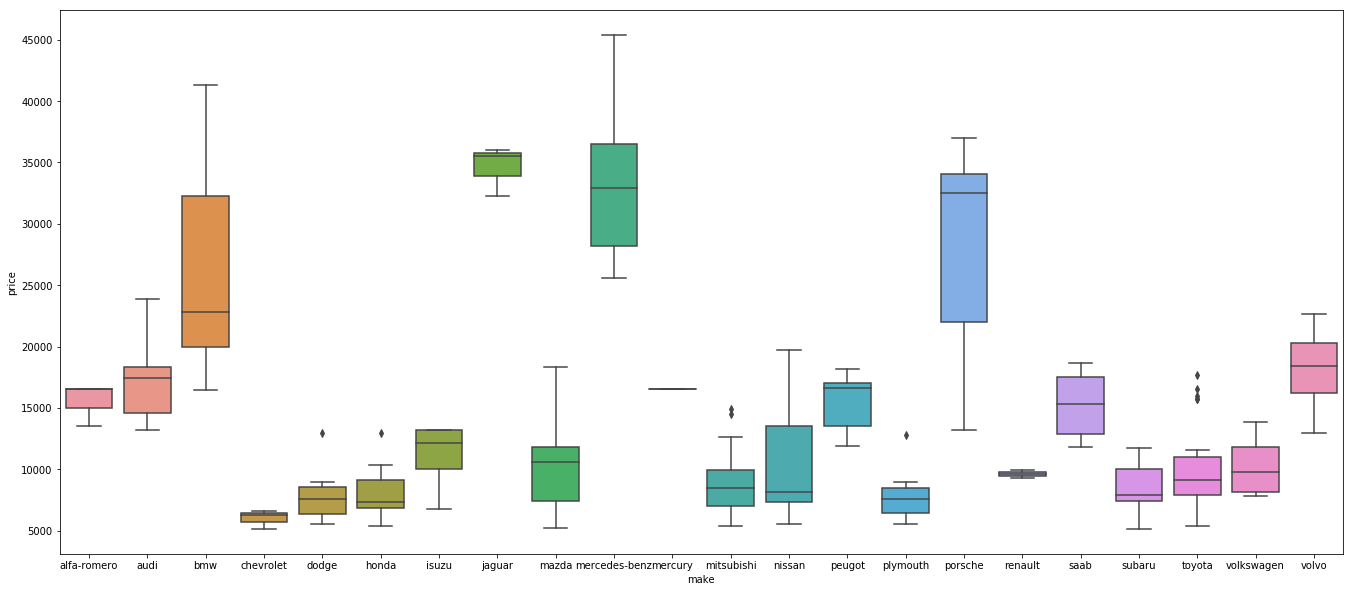

In [14]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(x="make", y="price", data=df)

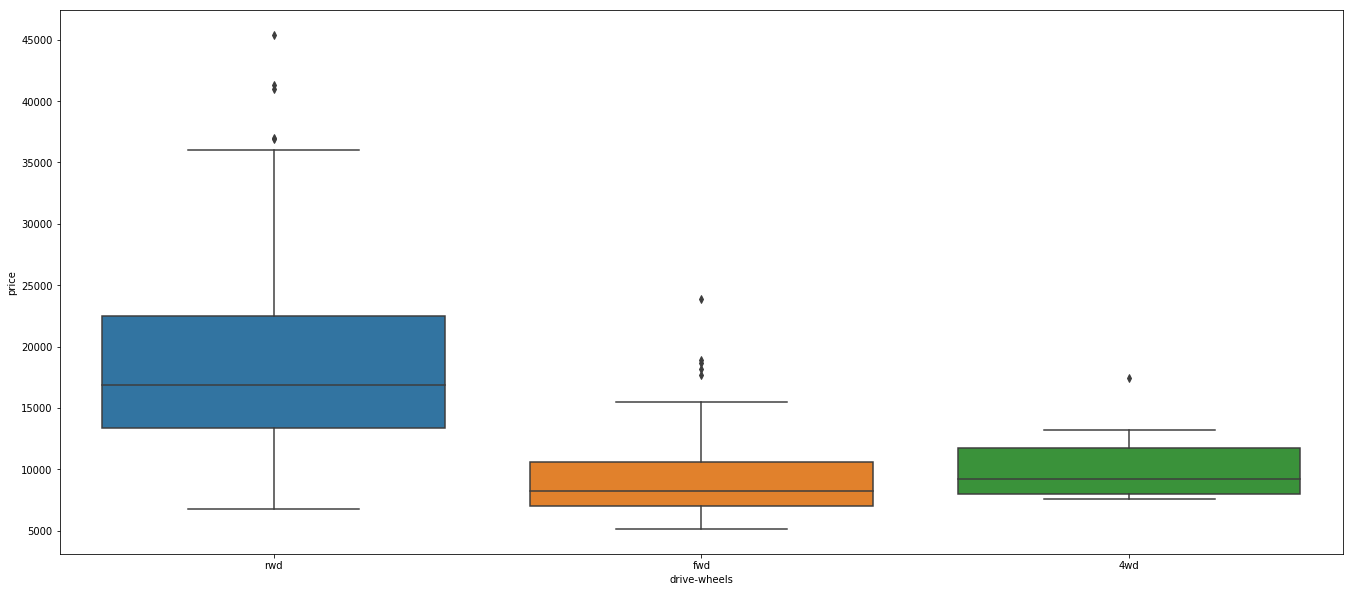

In [15]:
sns.boxplot(x="drive-wheels", y="price", data=df)

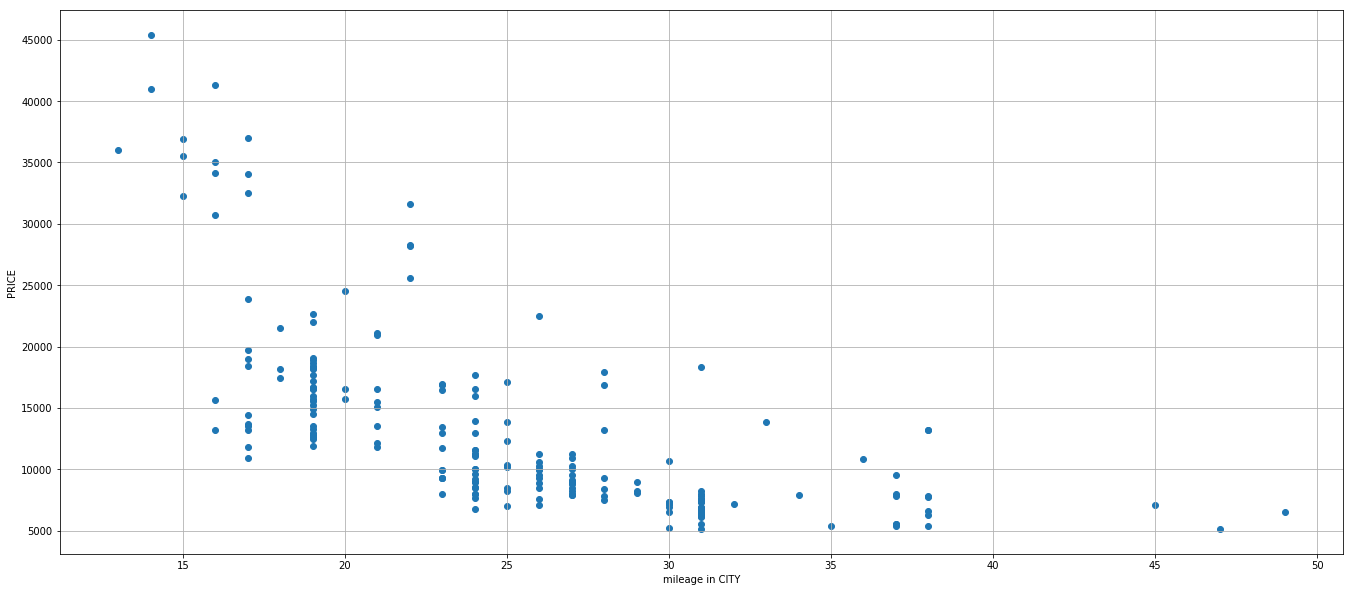

In [16]:
plt.scatter(df['city-mpg'],df['price'])
plt.xlabel("mileage in CITY")
plt.ylabel("PRICE")
plt.grid()

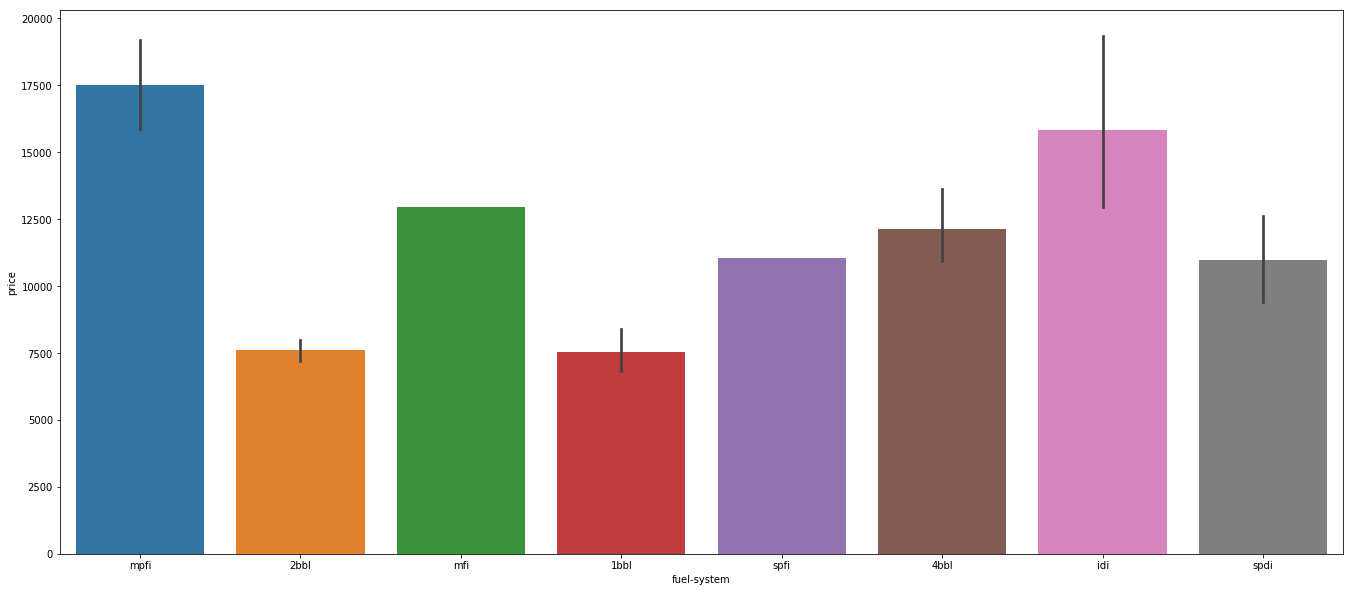

In [17]:
sns.barplot(x='fuel-system',y='price',data=df)

# One Hot Encoding

In [18]:
cat_vars=['symboling','make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for var in cat_vars:
   cat_list='var'+'_'+var
   cat_list = pd.get_dummies(df[var], prefix=var)
   df1=df.join(cat_list)
   df=df1
cat_vars=['symboling','make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
final_df=df.drop(['symboling','make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'],axis=1)
Y=final_df['price']
Y=np.array(Y)
X=final_df.drop(['price'],axis=1)
X=np.array(X)
print(Y.shape)
print(X.shape)

(205,)
(205, 78)


In [20]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model

ols = linear_model.LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
rfecv=rfecv.fit(X, Y)

# Recursive feature elimination
rfecv.transform(X)

# Number of best features
rfecv.n_features_

44

In [21]:
support=rfecv.support_
print(support)

[False False False  True False False False  True False  True False False
 False False False False  True False False False False False  True  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True False False  True False
 False False False False False  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False False False  True]


In [22]:
final_df.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'symboling_-2', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_diesel',
       'fuel-type_gas', 'aspiration_std', 'aspiration_turbo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front

In [23]:
support_col=final_df.columns
support_col=[i for i in support_col if i not in 'price']
#support_col

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'symboling_-2',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'make_alfa-romero',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel-type_diesel',
 'fuel-type_gas',
 'aspiration_std',
 'aspiration_turbo',
 'body-style_convertible',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'drive-wheels_4wd',
 'drive-wheels_fwd',
 'drive-wheels_rwd',
 'engine-location_front',
 'engine-location_rear',
 'engine-type_dohc',
 'e

# selected feature list

In [24]:
for i in range(len(support)):
    if support[i]==True:
        print(i,support_col[i])

3 width
7 bore
9 compression-ratio
16 symboling_0
22 make_bmw
23 make_chevrolet
24 make_dodge
26 make_isuzu
27 make_jaguar
28 make_mazda
29 make_mercedes-benz
30 make_mercury
31 make_mitsubishi
32 make_nissan
34 make_plymouth
35 make_porsche
36 make_renault
37 make_saab
38 make_subaru
39 make_toyota
40 make_volkswagen
42 fuel-type_diesel
43 fuel-type_gas
46 body-style_convertible
53 drive-wheels_rwd
54 engine-location_front
55 engine-location_rear
56 engine-type_dohc
57 engine-type_dohcv
59 engine-type_ohc
60 engine-type_ohcf
61 engine-type_ohcv
62 engine-type_rotor
63 num-of-cylinders_eight
64 num-of-cylinders_five
65 num-of-cylinders_four
66 num-of-cylinders_six
67 num-of-cylinders_three
68 num-of-cylinders_twelve
69 num-of-cylinders_two
70 fuel-system_1bbl
72 fuel-system_4bbl
73 fuel-system_idi
77 fuel-system_spfi
